In [ ]:
# pip install git+https://github.com/sec-edgar/sec-edgar.git
# pip install -U sec-edgar-downloader
# pip install lxml beautifulsoup4

### Download Form-4 

In [ ]:
# Another way to download Form-4. Not working in .ipynb

# from secedgar import CompanyFilings, FilingType
# my_filings = CompanyFilings(cik_lookup='aapl',
#               filing_type=FilingType.FILING_4,
#               count=15,
#               user_agent='Name (email)')

In [ ]:
# Set download location
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/prudential/

Mounted at /content/drive
/content/drive/My Drive/prudential


In [ ]:
# NO need to run again if the files are saved in the local. 
from sec_edgar_downloader import Downloader
dl = Downloader(".")
dl.get("4", "AMZN", after="2015-01-01", before="2020-12-31")

430

### Extract the useful content from Form-4

In [ ]:
from bs4 import BeautifulSoup
import os
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import MaxNLocator, IndexFormatter

In [ ]:
%cd /content/drive/My Drive/prudential/sec-edgar-filings/AMZN/4

/content/drive/My Drive/prudential/sec-edgar-filings/AMZN/4


In [ ]:
path = r'/content/drive/My Drive/prudential/sec-edgar-filings/AMZN/4'
filings = os.listdir(path)


In [ ]:
# Save all the filings into dic. Key is the filing's name and Value is the filing's content.
dic = {}
for filing in filings:
  xml_file = os.path.join(filing, 'filing-details.xml')
  with open(xml_file, 'r') as f:
    file = f.read()
    dic[filing] = file

In [ ]:
# One example
dic['0001018724-15-000162']

'<?xml version="1.0"?>\n<ownershipDocument>\n\n    <schemaVersion>X0306</schemaVersion>\n\n    <documentType>4</documentType>\n\n    <periodOfReport>2015-11-15</periodOfReport>\n\n    <notSubjectToSection16>0</notSubjectToSection16>\n\n    <issuer>\n        <issuerCik>0001018724</issuerCik>\n        <issuerName>AMAZON COM INC</issuerName>\n        <issuerTradingSymbol>AMZN</issuerTradingSymbol>\n    </issuer>\n\n    <reportingOwner>\n        <reportingOwnerId>\n            <rptOwnerCik>0001184755</rptOwnerCik>\n            <rptOwnerName>PIACENTINI DIEGO</rptOwnerName>\n        </reportingOwnerId>\n        <reportingOwnerAddress>\n            <rptOwnerStreet1>P.O. BOX 81226</rptOwnerStreet1>\n            <rptOwnerStreet2></rptOwnerStreet2>\n            <rptOwnerCity>SEATTLE</rptOwnerCity>\n            <rptOwnerState>WA</rptOwnerState>\n            <rptOwnerZipCode>98108-1226</rptOwnerZipCode>\n            <rptOwnerStateDescription></rptOwnerStateDescription>\n        </reportingOwnerAdd

In [ ]:
len(dic.keys())

430

In [ ]:
num_job = {} # The dictionary where keys are the job title and values are the number of job title that appears between 2015 to 2020.
num_eachweek = {} # The dictionary where keys are the first date of the week that the filing appears, and values are the num of filings that appear in that week.
for k,v in dic.items():
  soup = BeautifulSoup(v, 'xml')
  title = soup.find_all('officerTitle')
  for t in title:
    if t.text not in num_job.keys():
      num_job[t.text] = 0
    else:
      num_job[t.text] += 1
    if t.text is not '': # Only report Form-4 with job title!
      date = soup.find_all('transactionDate') # We use the first transaction date to record Form-4.
      dt = datetime.strptime(date[0].text,'\n%Y-%m-%d\n')
      start = dt - timedelta(days=dt.weekday())
      date_of_week = str(start)[:10] # Swith the date into the first date of that week.
      if date_of_week not in num_eachweek.keys():
        num_eachweek[date_of_week] = 1
      else:
        num_eachweek[date_of_week] += 1


In [ ]:
num_job

{'Chairman, CEO and President': 60,
 'CEO Worldwide Consumer': 74,
 'Senior Vice President and CFO': 28,
 'Senior Vice President': 84,
 'Vice President': 26,
 'CEO Amazon Web Services': 27,
 '': 85}

In [ ]:
num_eachweek

{'2020-11-30': 2,
 '2020-11-23': 2,
 '2020-11-16': 2,
 '2020-11-09': 5,
 '2020-11-02': 9,
 '2020-10-19': 1,
 '2020-09-28': 4,
 '2020-09-07': 1,
 '2020-08-31': 1,
 '2020-08-24': 3,
 '2020-08-10': 6,
 '2020-08-03': 5,
 '2020-06-29': 1,
 '2020-05-18': 2,
 '2020-05-11': 6,
 '2020-05-04': 2,
 '2020-04-13': 1,
 '2020-03-30': 1,
 '2020-03-02': 1,
 '2020-02-17': 2,
 '2020-02-10': 6,
 '2020-02-03': 5,
 '2020-01-27': 3,
 '2019-12-23': 2,
 '2019-11-18': 2,
 '2019-11-11': 7,
 '2019-09-09': 1,
 '2019-09-02': 1,
 '2019-08-26': 2,
 '2019-08-19': 1,
 '2019-08-12': 6,
 '2019-07-29': 5,
 '2019-07-08': 2,
 '2019-05-20': 1,
 '2019-05-13': 7,
 '2019-05-06': 1,
 '2019-04-29': 1,
 '2019-03-18': 1,
 '2019-02-25': 1,
 '2019-02-18': 2,
 '2019-02-11': 6,
 '2019-02-04': 2,
 '2018-11-26': 1,
 '2018-11-19': 2,
 '2018-11-12': 7,
 '2018-10-29': 2,
 '2018-09-10': 1,
 '2018-09-03': 2,
 '2018-08-27': 1,
 '2018-08-20': 2,
 '2018-08-13': 7,
 '2018-07-30': 1,
 '2018-05-21': 1,
 '2018-05-14': 7,
 '2018-04-30': 2,
 '2018-04-

In [ ]:
# Add all the weeks(shown as the first date of the week) between 2015-01-01 to 2020-12-31 to the dictionary.
next_monday = '2014-12-29'
while next_monday != '2021-01-04':
  next_monday = str(datetime.strptime(next_monday,'%Y-%m-%d') + timedelta(days=7))[:10]
  if next_monday not in num_eachweek.keys():
    num_eachweek[next_monday] = 0


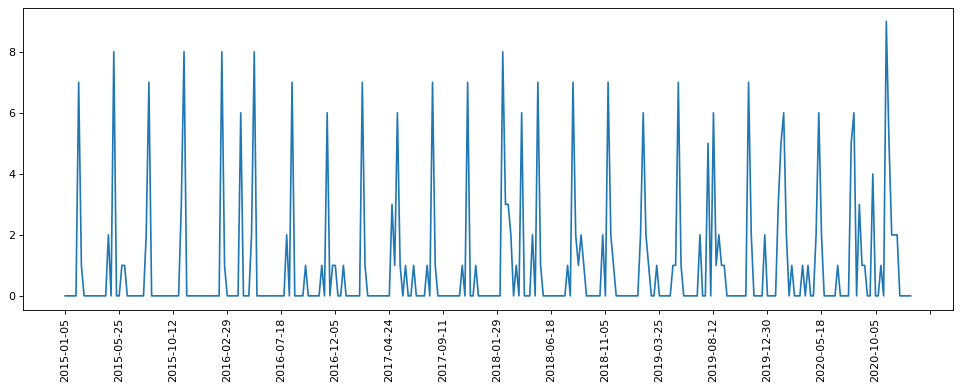

In [ ]:
# Plot the time series 
figure(figsize=(15, 5), dpi=80)
x,y = zip(*sorted(num_eachweek.items()))
plt.plot(x,y)
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(MaxNLocator(20))
plt.show()

In [ ]:
num_eachweek

{'2020-11-30': 2,
 '2020-11-23': 2,
 '2020-11-16': 2,
 '2020-11-09': 5,
 '2020-11-02': 9,
 '2020-10-19': 1,
 '2020-09-28': 4,
 '2020-09-07': 1,
 '2020-08-31': 1,
 '2020-08-24': 3,
 '2020-08-10': 6,
 '2020-08-03': 5,
 '2020-06-29': 1,
 '2020-05-18': 2,
 '2020-05-11': 6,
 '2020-05-04': 2,
 '2020-04-13': 1,
 '2020-03-30': 1,
 '2020-03-02': 1,
 '2020-02-17': 2,
 '2020-02-10': 6,
 '2020-02-03': 5,
 '2020-01-27': 3,
 '2019-12-23': 2,
 '2019-11-18': 2,
 '2019-11-11': 7,
 '2019-09-09': 1,
 '2019-09-02': 1,
 '2019-08-26': 2,
 '2019-08-19': 1,
 '2019-08-12': 6,
 '2019-07-29': 5,
 '2019-07-08': 2,
 '2019-05-20': 1,
 '2019-05-13': 7,
 '2019-05-06': 1,
 '2019-04-29': 1,
 '2019-03-18': 1,
 '2019-02-25': 1,
 '2019-02-18': 2,
 '2019-02-11': 6,
 '2019-02-04': 2,
 '2018-11-26': 1,
 '2018-11-19': 2,
 '2018-11-12': 7,
 '2018-10-29': 2,
 '2018-09-10': 1,
 '2018-09-03': 2,
 '2018-08-27': 1,
 '2018-08-20': 2,
 '2018-08-13': 7,
 '2018-07-30': 1,
 '2018-05-21': 1,
 '2018-05-14': 7,
 '2018-04-30': 2,
 '2018-04-

In [ ]:
# Second way to plot (using data frame).
df = pd.DataFrame.from_dict(num_eachweek,orient='index',columns=['num'])

In [ ]:
df

,num
2020-11-30,2
2020-11-23,2
2020-11-16,2
2020-11-09,5
2020-11-02,9
...,...
2020-12-07,0
2020-12-14,0
2020-12-21,0
2020-12-28,0


In [ ]:
df.sort_index()

,num
2015-01-05,0
2015-01-12,0
2015-01-19,0
2015-01-26,0
2015-02-02,0
...,...
2020-12-07,0
2020-12-14,0
2020-12-21,0
2020-12-28,0


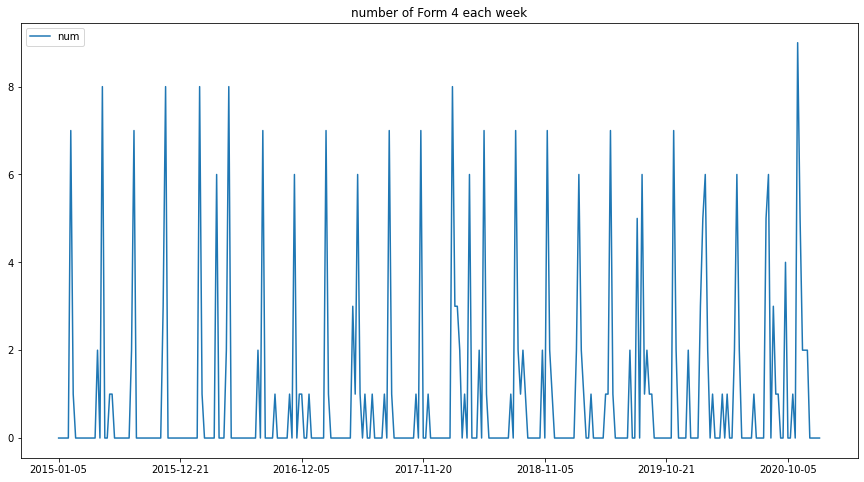

In [ ]:
df.sort_index().plot(figsize=(15,8), title='number of Form 4 each week')